<a href="https://colab.research.google.com/github/Vkavyasree732/Repository1/blob/main/Assignment_8_MHC2024008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor()
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
from torch import optim

import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_data=CIFAR100(root='./data',train=True,transform=ToTensor(),download=True)
train_loader=DataLoader(train_data,batch_size=64,shuffle=True)

100%|██████████| 170M/170M [00:03<00:00, 56.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### VGG16

In [ ]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16,self).__init__()
        self.conv1_1=nn.Conv2d(3,64,3,padding=1)
        self.conv1_2=nn.Conv2d(64,64,3,padding=1)
        self.conv2_1=nn.Conv2d(64,128,3,padding=1)
        self.conv2_2=nn.Conv2d(128,128,3,padding=1)
        self.conv3_1=nn.Conv2d(128,256,3,padding=1)
        self.conv3_2=nn.Conv2d(256,256,3,padding=1)
        self.conv3_3=nn.Conv2d(256,256,3,padding=1)
        self.conv4_1=nn.Conv2d(256,512,3,padding=1)
        self.conv4_2=nn.Conv2d(512,512,3,padding=1)
        self.conv4_3=nn.Conv2d(512,512,3,padding=1)
        self.conv5_1=nn.Conv2d(512,512,3,padding=1)
        self.conv5_2=nn.Conv2d(512,512,3,padding=1)
        self.conv5_3=nn.Conv2d(512,512,3,padding=1)
        self.pool=nn.MaxPool2d(2,2)
        self.fc1=nn.Linear(512,512)
        self.fc2=nn.Linear(512,512)
        self.fc3=nn.Linear(512,100)

    def forward(self,x):
        x=F.relu(self.conv1_1(x))
        x=F.relu(self.conv1_2(x))
        x=self.pool(x)
        x=F.relu(self.conv2_1(x))
        x=F.relu(self.conv2_2(x))
        x=self.pool(x)
        x=F.relu(self.conv3_1(x))
        x=F.relu(self.conv3_2(x))
        x=F.relu(self.conv3_3(x))
        x=self.pool(x)
        x=F.relu(self.conv4_1(x))
        x=F.relu(self.conv4_2(x))
        x=F.relu(self.conv4_3(x))
        x=self.pool(x)
        x=F.relu(self.conv5_1(x))
        x=F.relu(self.conv5_2(x))
        x=F.relu(self.conv5_3(x))
        x=self.pool(x)
        x=x.reshape(x.shape[0],-1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [ ]:
model=VGG16().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr0.001)

In [ ]:
loss_VGG,acc_VGG=[],[]
for epoch in range(10):
    num_correct=0
    num_samples=0
    for batch,(data,target) in enumerate(train_loader):
        data=data.to(device)
        target=target.to(device)

        output=model(data)
        loss=criterion(output,target)

        _,preds=output.max(1)
        num_correct+=(preds==target).sum()
        num_samples+=preds.size(0)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_VGG.append(loss.item())
        acc_VGG.append(float(num_correct)/num_samples*100)
    print(f'Epoch: {epoch+1}/{10}, Loss: {loss_VGG[-1]:.4f}, Accuracy: {acc_VGG[-1]:.2f}')


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 1/20, Loss: 2.3003, Accuracy: 10.01


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 2/20, Loss: 2.3041, Accuracy: 9.97


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 3/20, Loss: 2.3028, Accuracy: 9.70


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 4/20, Loss: 2.3046, Accuracy: 9.81


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 5/20, Loss: 2.3015, Accuracy: 9.86


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 6/20, Loss: 2.2991, Accuracy: 9.94


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 7/20, Loss: 2.3023, Accuracy: 9.87


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 8/20, Loss: 2.3036, Accuracy: 9.78


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 9/20, Loss: 2.3013, Accuracy: 9.81


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 10/20, Loss: 2.3041, Accuracy: 10.02


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 11/20, Loss: 2.3018, Accuracy: 9.69


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 12/20, Loss: 2.3016, Accuracy: 9.83


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 13/20, Loss: 2.3052, Accuracy: 9.95


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 14/20, Loss: 2.3019, Accuracy: 9.90


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 15/20, Loss: 2.3041, Accuracy: 9.73


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 16/20, Loss: 2.3022, Accuracy: 9.66


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 17/20, Loss: 2.3004, Accuracy: 9.74


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 18/20, Loss: 2.3022, Accuracy: 9.82


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 19/20, Loss: 2.3017, Accuracy: 10.00


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 20/20, Loss: 2.3022, Accuracy: 10.00


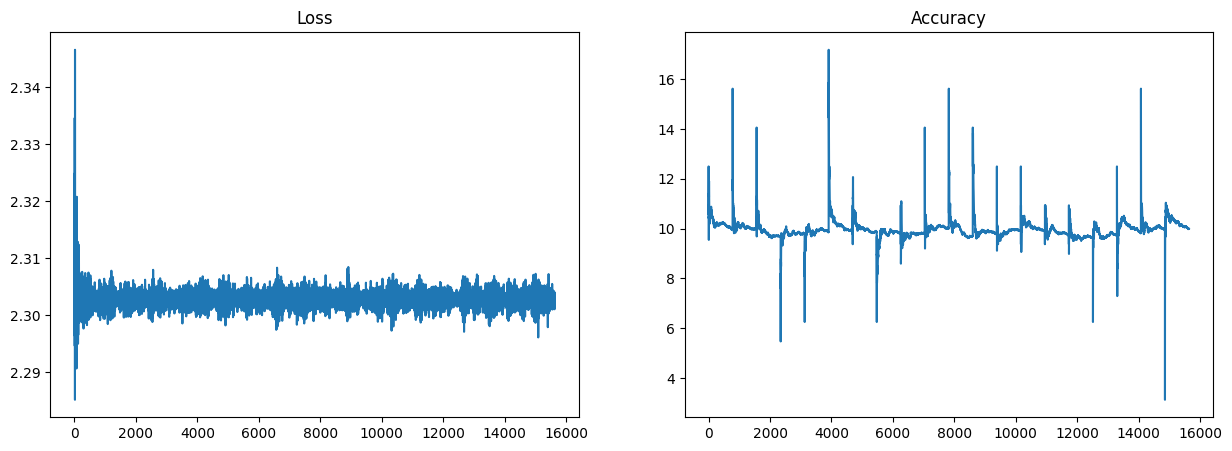

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(loss_VGG)
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(acc_VGG)
plt.title('Accuracy')
plt.show()

### ResNet

In [ ]:
class block(nn.Module):
    def __init__(self,ins,outs,num_layers):
        super(block,self).__init__()
        self.ins=ins
        self.outs=outs
        self.num_layers=num_layers
        self.conv1=nn.Conv2d(ins,outs,3,padding=1)
        self.bn1=nn.BatchNorm2d(outs)
        self.conv2=nn.Conv2d(outs,outs,3,padding=1)
        self.bn2=nn.BatchNorm2d(outs)
        if(num_layers==3):
            self.conv3=nn.Conv2d(outs,outs,3,padding=1)
            self.bn3=nn.BatchNorm2d(outs)
        self.relu=nn.ReLU()
        self.pool=nn.MaxPool2d(2,2)
        if(ins!=outs):
            self.sp=nn.Conv2d(ins,outs,1)
            self.bn=nn.BatchNorm2d(outs)

    def forward(self,x):
        i=x
        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu(x)
        x=self.conv2(x)
        x=self.bn2(x)
        if(self.num_layers==3):
            x=self.conv3(x)
            x=self.bn3(x)
        if(self.ins!=self.outs):
            i=self.sp(i)
            i=self.bn(i)
        x+=i
        x=self.relu(x)
        x=self.pool(x)
        return x

In [ ]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet,self).__init__()
        self.block1=block(3,64,2)
        self.block2=block(64,128,2)
        self.block3=block(128,256,3)
        self.block4=block(256,512,3)
        self.block5=block(512,512,3)
        # fc layers changed: only 512 units after flattening, does not make sense to make 2 layers with 4069 units
        self.fc1=nn.Linear(512*1*1,4096)
        self.fc2=nn.Linear(4096,4096)
        self.fc3=nn.Linear(4096,10)

    def forward(self,x):
        x=self.block1(x)
        x=self.block2(x)
        x=self.block3(x)
        x=self.block4(x)
        x=self.block5(x)
        x=x.view(-1,512*1*1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [ ]:
model=ResNet().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr0.001)

In [ ]:
loss_ResNet,acc_ResNet=[],[]
for epoch in range(10):
    num_correct=0
    num_samples=0
    for batch,(data,target) in enumerate(train_loader):
        data=data.to(device)
        target=target.to(device)

        output=model(data)
        loss=criterion(output,target)

        _,preds=output.max(1)
        num_correct+=(preds==target).sum()
        num_samples+=preds.size(0)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_ResNet.append(loss.item())
        acc_ResNet.append(float(num_correct)/num_samples*100)
    print(f'Epoch: {epoch+1}/{10}, Loss: {loss_ResNet[-1]:.4f}, Accuracy: {acc_ResNet[-1]:.2f}')

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 1/20, Loss: 0.9252, Accuracy: 47.85


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 2/20, Loss: 0.4437, Accuracy: 68.82


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 3/20, Loss: 0.6032, Accuracy: 77.53


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 4/20, Loss: 0.7015, Accuracy: 82.07


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 5/20, Loss: 0.4254, Accuracy: 85.29


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 6/20, Loss: 0.0814, Accuracy: 87.82


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 7/20, Loss: 0.1777, Accuracy: 90.07


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 8/20, Loss: 0.3163, Accuracy: 91.81


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 9/20, Loss: 0.6850, Accuracy: 93.33


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 10/20, Loss: 0.2786, Accuracy: 94.34


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 11/20, Loss: 0.3603, Accuracy: 95.20


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 12/20, Loss: 0.3198, Accuracy: 96.16


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 13/20, Loss: 0.0741, Accuracy: 96.30


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 14/20, Loss: 0.3912, Accuracy: 96.79


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 15/20, Loss: 0.0884, Accuracy: 97.25


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 16/20, Loss: 0.1457, Accuracy: 97.40


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 17/20, Loss: 0.1207, Accuracy: 97.63


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 18/20, Loss: 0.0415, Accuracy: 97.78


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 19/20, Loss: 0.0201, Accuracy: 97.99


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 20/20, Loss: 0.0216, Accuracy: 98.00


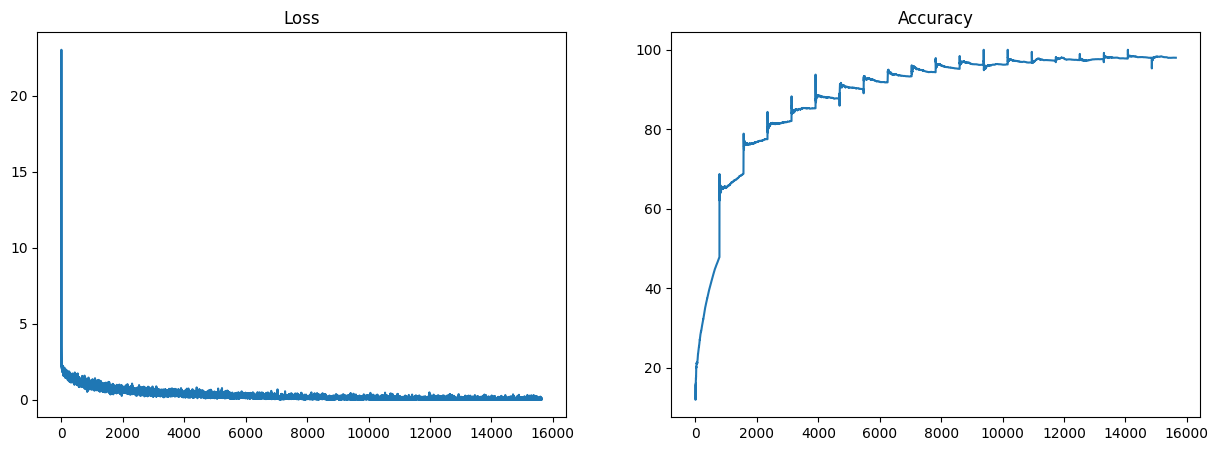

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(loss_ResNet)
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(acc_ResNet)
plt.title('Accuracy')
plt.show()

### InceptionNet

In [ ]:
class conv_block(nn.Module):
    def __init__(self, ins, outs, **kwargs):
        super(conv_block, self).__init__()
        self.relu=nn.ReLU()
        self.conv=nn.Conv2d(ins, outs, **kwargs)
        self.batchnorm=nn.BatchNorm2d(outs)

    def forward(self, x):
        return self.relu(self.batchnorm(self.conv(x)))

In [ ]:
class Inception_block(nn.Module):
    def __init__(self,ins,out_1x1,red_3x3,out_3x3,red_5x5,out_5x5,out_1x1pool,outs):
        super(Inception_block, self).__init__()

        self.branch1=conv_block(ins,out_1x1,kernel_size=1)

        self.branch2=nn.Sequential(
            conv_block(ins,red_3x3,kernel_size=1),
            conv_block(red_3x3,out_3x3,kernel_size=3,padding=1)
        )

        self.branch3=nn.Sequential(
            conv_block(ins,red_5x5,kernel_size=1),
            conv_block(red_5x5,out_5x5,kernel_size=5,padding=2)
        )

        self.branch4=nn.Sequential(
            nn.MaxPool2d(kernel_size=3,padding=1,stride=1),
            conv_block(ins,out_1x1pool,kernel_size=1)
        )

        # used to convert out channels same as in VGG
        self.conv=nn.Conv2d(out_1x1+out_3x3+out_5x5+out_1x1pool,outs,1)

    def forward(self,x):
        x=torch.cat([self.branch1(x),self.branch2(x),self.branch3(x),self.branch4(x)],1)
        x=self.conv(x)
        return x

In [ ]:
class InceptionNet(nn.Module):
    def __init__(self):
        super(InceptionNet, self).__init__()

        self.inception1=Inception_block(3,64,96,128,16,32,32,64)
        self.inception2=Inception_block(64,128,128,192,32,96,64,128)
        self.inception3=Inception_block(128,192,96,208,16,48,64,256)
        self.inception4=Inception_block(256,160,112,224,24,64,64,512)
        self.inception5=Inception_block(512,128,128,256,24,64,64,512)
        self.maxpool=nn.MaxPool2d(2,2)
        self.avgpool=nn.AvgPool2d(kernel_size=2,stride=1)
        self.fc1=nn.Linear(512*1*1,4096)
        self.fc2=nn.Linear(4096,4096)
        self.fc3=nn.Linear(4096,10)

    def forward(self,x):
        x=self.inception1(x)
        x=self.maxpool(x)
        x=self.inception2(x)
        x=self.maxpool(x)
        self.maxpool(x)
        x=self.inception3(x)
        x=self.maxpool(x)
        x=self.inception4(x)
        x=self.maxpool(x)
        x=self.inception5(x)
        x=self.avgpool(x)
        x=x.view(-1,512*1*1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [ ]:
model=InceptionNet().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr0.001)

In [ ]:
loss_InceptionNet,acc_InceptionNet=[],[]
for epoch in range(10):
    num_correct=0
    num_samples=0
    for batch,(data,target) in enumerate(train_loader):
        data=data.to(device)
        target=target.to(device)

        output=model(data)
        loss=criterion(output,target)

        _,preds=output.max(1)
        num_correct+=(preds==target).sum()
        num_samples+=preds.size(0)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_InceptionNet.append(loss.item())
        acc_InceptionNet.append(float(num_correct)/num_samples*100)
    print(f'Epoch: {epoch+1}/{10}, Loss: {loss_InceptionNet[-1]:.4f}, Accuracy: {acc_InceptionNet[-1]:.2f}')

  0%|          | 0/782 [00:00<?, ?it/s]

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(loss_InceptionNet)
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(acc_InceptionNet)
plt.title('Accuracy')
plt.show()